In [2]:
# df_EUR_M_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_monthly_capitalization.csv')
# df_EUR_M_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_monthly_return.csv')
# df_EUR_Y_cap=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_yearly_capitalization.csv')
# df_EUR_Y_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/df_EUR_yearly_return.csv')

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [4]:
df_EUR_M_RI=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/ex_2/df_EUR_monthly_RI.csv')
df_E_score=pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/baltha/DS_EScore_Y.csv')

In [5]:
df_E_score

,ISIN,NAME,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,...,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020,x2021,x2022
0,AN8068571086,SCHLUMBERGER,NaN,NaN,NaN,53.65,23.33,0.00,0.00,40.70,...,64.75,75.71,71.54,73.65,85.87,81.71,80.89,78.25,87.80,86.10
1,AT000000STR1,STRABAG SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.09,48.69,55.55,56.98,58.49,64.61,62.49,60.42,58.09,56.89
2,AT00000VIE62,FLUGHAFEN WIEN,NaN,NaN,NaN,NaN,18.31,27.55,10.48,4.84,...,27.17,34.81,51.84,47.48,78.01,76.99,71.53,75.00,78.49,NaN
3,AT0000606306,RAIFFEISEN BANK INTL.,NaN,NaN,NaN,NaN,NaN,NaN,25.56,23.63,...,68.68,73.75,75.14,82.52,82.94,61.29,63.22,61.36,62.62,61.64
4,AT0000652011,ERSTE GROUP BANK,NaN,NaN,NaN,27.08,24.60,25.81,25.56,30.64,...,83.81,79.57,81.98,83.86,87.20,80.89,81.18,79.44,76.58,76.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,US9839191015,XILINX DEAD - DELIST.15/02/22,NaN,NaN,NaN,0.00,0.00,8.15,0.00,43.23,...,33.70,25.88,27.68,38.31,41.42,NaN,56.70,57.38,NaN,NaN
1527,US98421M1062,XEROX HOLDINGS,NaN,NaN,NaN,NaN,NaN,NaN,74.94,76.45,...,79.45,79.67,85.00,92.80,77.37,74.08,76.22,73.46,77.11,74.54
1528,US9884981013,YUM! BRANDS,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,...,62.91,66.98,76.89,80.63,80.92,82.19,84.67,88.84,87.72,NaN
1529,US98956P1021,ZIMMER BIOMET HDG.,NaN,NaN,NaN,0.00,18.18,24.11,21.85,28.25,...,54.10,51.30,54.55,9.37,8.92,13.41,23.33,38.82,38.19,35.17


In [6]:
import re
cleaned_column_names = [re.sub(r'x', '', col).strip() for col in df_E_score.columns]
df_E_score.columns = cleaned_column_names

In [7]:
df_E_score['ISIN_First2'] = df_E_score['ISIN'].str[:2]
firms_list = df_E_score['NAME'].tolist()

df_EUR_M_RI = df_EUR_M_RI.iloc[:, 4:]
df_transposed = df_EUR_M_RI.transpose().reset_index()

# Set the column names to be the values from the second row
df_transposed.columns = df_transposed.iloc[0]

# Drop the second row which now contains the original column names
df_transposed = df_transposed.drop(0)

# Reset the index
df_transposed = df_transposed.reset_index(drop=True)


df_transposed = df_transposed.rename(columns={'NAME': 'DATE'})

df_transposed= df_transposed[['DATE'] + [col for col in df_transposed.columns if col in firms_list]]
df_transposed.iloc[:, 0] = pd.to_datetime(df_transposed.iloc[:, 0])

# Change the other columns to float
df_transposed.iloc[:, 1:] = df_transposed.iloc[:, 1:].astype(float)


In [8]:
exp_returns = pd.DataFrame()
exp_returns['FIRMS'] = None
exp_returns['RETURNS'] = 0

In [9]:
exp_returns['FIRMS'] =  df_transposed.columns.tolist()[1:]
exp_returns['RETURNS'] = df_transposed.iloc[:, 1:].pct_change().mean().tolist()
exp_returns

C:\Users\giamm\AppData\Local\Temp\ipykernel_19452\184449248.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exp_returns['RETURNS'] = df_transposed.iloc[:, 1:].pct_change().mean().tolist()


,FIRMS,RETURNS
0,FLUGHAFEN WIEN,0.011161
1,ERSTE GROUP BANK,0.013393
2,OMV,0.014295
3,VERBUND,0.013558
4,WIENERBERGER,0.009058
...,...,...
418,HEXAGON B,0.022688
419,ELECTROLUX B,0.009853
420,ATLAS COPCO A,0.017372
421,MODERN TIMES GROUP MTG B,0.009320


In [10]:
df_transposed.set_index("DATE", inplace=True)
window=96
Covar=df_transposed.pct_change().rolling(window).cov()
cov_m = Covar.loc["2008-01-31"]
cov_m

c:\Users\giamm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\giamm\AppData\Local\Temp\ipykernel_19452\1561053581.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Covar=df_transposed.pct_change().rolling(window).cov()


,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,HOLMEN B,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
0,,,,,,,,,,,,,,,,,,,,,
FLUGHAFEN WIEN,0.004125,0.002375,0.002449,0.002799,0.002050,0.001290,0.002290,0.001821,0.000853,0.001328,...,0.001846,0.001459,0.002808,0.002381,0.000642,0.002452,0.001875,0.001826,0.002177,0.003774
ERSTE GROUP BANK,0.002375,0.004986,0.001841,0.002556,0.002423,0.001003,0.002742,0.001853,0.001344,0.002037,...,0.001297,0.001471,0.001882,0.001893,0.001711,0.002415,0.001643,0.001117,0.001530,0.001939
OMV,0.002449,0.001841,0.007851,0.002915,0.002309,0.001209,0.003042,0.001830,0.000859,0.000831,...,0.002253,0.001367,0.003655,0.002116,0.000778,0.002572,0.001755,0.002017,0.002965,0.006322
VERBUND,0.002799,0.002556,0.002915,0.006502,0.002112,0.002058,0.001772,0.002146,0.001146,0.001662,...,0.001090,0.000827,0.002084,0.001737,0.001173,0.002311,0.000720,0.000784,0.002928,0.002985
WIENERBERGER,0.002050,0.002423,0.002309,0.002112,0.005933,0.001324,0.002303,0.002367,0.001211,0.001862,...,0.002305,0.002152,0.002471,0.002317,0.001126,0.003297,0.002732,0.001915,0.001484,0.002831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,0.002452,0.002415,0.002572,0.002311,0.003297,0.000698,0.003452,0.002699,0.000619,0.002580,...,0.003346,0.002268,0.004998,0.004479,0.000812,0.009246,0.003863,0.004329,0.004553,0.005062
ELECTROLUX B,0.001875,0.001643,0.001755,0.000720,0.002732,0.000232,0.002913,0.002036,0.000843,0.001556,...,0.003778,0.001989,0.004827,0.004026,-0.000041,0.003863,0.009491,0.005960,0.005393,0.005145
ATLAS COPCO A,0.001826,0.001117,0.002017,0.000784,0.001915,0.000522,0.002833,0.001789,0.000148,0.001442,...,0.004723,0.002192,0.007701,0.005002,0.000428,0.004329,0.005960,0.009702,0.006365,0.007218


In [11]:
df_transposed

,FLUGHAFEN WIEN,ERSTE GROUP BANK,OMV,VERBUND,WIENERBERGER,VIENNA INSURANCE GROUP A,VOESTALPINE,MAYR-MELNHOF KARTON,IMMOFINANZ,SOLVAY,...,HOLMEN B,FABEGE,KINNEVIK B,INVESTOR A,SWEDISH MATCH DEAD - DELIST.02/01/23,HEXAGON B,ELECTROLUX B,ATLAS COPCO A,MODERN TIMES GROUP MTG B,BOLIDEN ORD SHS
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-31,156.25,94.91,389.64,524.6,2379.46,161.98,154.48,111.26,130.43,3824.32,...,266.06,9.3,51.89,582.75,17.32,36.82,533.0,221.48,76.83,15.72
2000-02-29,153.83,97.74,318.75,564.59,2203.58,156.68,147.4,113.86,129.17,3886.65,...,233.04,9.69,65.4,598.76,16.79,39.76,470.45,202.18,85.51,11.76
2000-03-31,158.62,100.5,311.41,518.56,2451.55,155.74,148.8,104.32,128.94,4007.51,...,239.32,10.21,69.13,664.65,15.84,43.52,473.03,212.75,79.92,11.49
2000-04-30,137.27,96.13,335.24,463.37,2552.81,152.34,136.9,97.96,122.9,3785.57,...,202.79,11.08,59.51,619.95,16.42,40.83,432.63,209.47,80.98,8.9
2000-05-31,148.95,97.86,356.91,498.05,2746.8,159.84,132.23,100.94,128.81,3728.38,...,220.1,10.63,56.47,582.66,17.04,40.49,431.17,198.64,73.42,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1215.93,367.15,3758.17,7555.23,5022.24,493.88,847.25,1135.16,79.81,8633.47,...,2506.55,200.89,287.41,5884.82,1070.45,3546.68,1819.41,6823.05,100.69,35.64
2022-09-30,1190.06,360.26,3396.99,6751.05,4318.66,425.22,718.38,979.78,65.56,8307.13,...,2223.09,156.57,266.62,5440.4,1053.44,3250.81,1558.19,6300.71,76.18,34.45
2022-10-31,1198.76,400.68,4277.1,6172.06,4894.01,464.9,909.74,1078.3,63.28,9601.17,...,2106.86,166.1,247.62,5984.28,1092.55,3404.96,1834.65,7188.93,85.61,32.1


In [12]:
bounds = tuple((0, 1) for asset in range(len(exp_returns)))

In [13]:
from scipy.optimize import minimize
def cons():
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]
    bounds = tuple((0, 1) for asset in range(len(exp_returns)))
    in_weights = np.ones(len(exp_returns)) / len(exp_returns)
    return constraints, bounds, in_weights

constraints, bounds, in_weights = cons()

def objective_function(weights,cov_m):
    return weights.T @ cov_m @ weights

def optimal_portfolio(weights,cov):
    x = minimize(
    objective_function,
    in_weights,
    cov_m,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints)
    return x

In [14]:
# Define the start and end years for the rolling window + initial weight df
start_year = 2000
end_year = 2022

returns = df_transposed.pct_change()
optimal_weights_df = pd.DataFrame()

# Loop over each year from the end of 2007 to the end of 2022
for year in range(2007, end_year + 1):
    start_date = f"{year - 7}-12-31"
    end_date = f"{year}-12-31"

    filtered_rows = returns.loc[(returns.index >= start_date) & (returns.index <= end_date)]

    # Calculate the expected returns for the current rolling window
    ER = filtered_rows.mean(axis=1)
    ER = ER.to_frame(name=f'expected_returns_{year}')

    # Calculate the covariance matrix for the current rolling window
    transposed_df = filtered_rows.T
    transposed_df = transposed_df.astype(float)
    CM = transposed_df.cov()

    optimal_weights_df[f'Weights_{year}'] = optimal_portfolio(in_weights,CM).x
    optimal_weights_df[f'SC_{year}'] = optimal_weights_df[f'Weights_{year}'] * df_E_score[str(year)]

C:\Users\giamm\AppData\Local\Temp\ipykernel_19452\1091381391.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  returns = df_transposed.pct_change()


In [45]:
SC = []
df_E_score
for column in df_E_score.columns:
    # Check if the column name contains 'SC_'
    if '20' in column:
        # Sum the values in the column and append to SC_Y
        sum_SC = df_E_score[column].sum()
        SC.append(sum_SC)

In [50]:
for i in years:
    print(i)

2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [62]:
SC
years = range(2007, 2023)

# Step 3: Convert lists into a DataFrame
data = {'Year': years, 'Value': SC[-16:]}
SC_d = pd.DataFrame(data)

In [63]:
SC_d

,Year,Value
0,2007,54002.80
1,2008,64284.30
2,2009,70153.83
3,2010,74660.87
4,2011,77084.47
5,2012,78605.91
6,2013,79130.28
7,2014,80222.69
8,2015,83718.61
9,2016,86668.41


In [16]:
SC_gmv = []
for column in optimal_weights_df.columns:
    # Check if the column name contains 'SC_'
    if 'SC_' in column:
        # Sum the values in the column and append to SC_Y
        sum_SC = optimal_weights_df[column].sum()
        SC_gmv.append(sum_SC)

In [59]:
SC_gmv
data = {'Year': years, 'Value': SC_gmv[-16:]}
SC_gmv = pd.DataFrame(data)

In [65]:
SC_gmv

,Year,Value
0,2007,41.157706
1,2008,48.300539
2,2009,53.744448
3,2010,54.785822
4,2011,58.573385
5,2012,57.076733
6,2013,51.756730
7,2014,54.994709
8,2015,59.362384
9,2016,64.953858


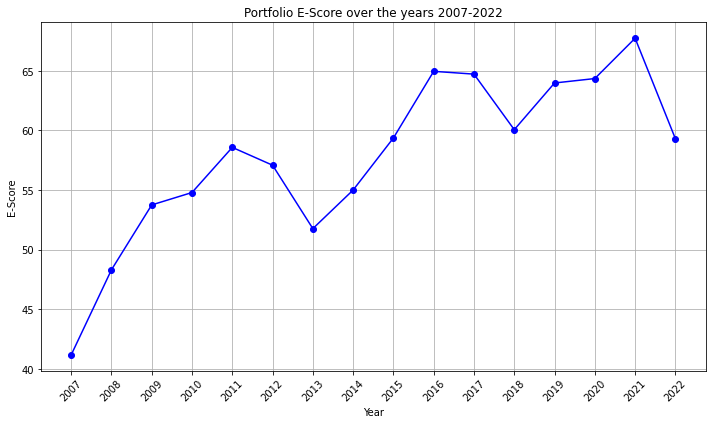

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(SC_gmv.Year, SC_gmv.Value, marker='o', color='b', linestyle='-')
plt.title('Portfolio E-Score over the years 2007-2022')
plt.xlabel('Year')
plt.ylabel('E-Score')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

In [98]:
from scipy.optimize import minimize

def cons():
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]
    bounds = tuple((0, 1) for asset in range(len(exp_returns)))
    in_weights = np.ones(len(exp_returns)) / len(exp_returns)
    return constraints, bounds, in_weights

def cons_with_improvement():
    constraints, bounds, in_weights = cons()
    constraints.append({'type': 'ineq', 'fun': lambda weights: weights.T * SC_d[-2] - 1.2 * (optimal_weights_df['Weights_2021'].T * optimal_weights_df['SC_2021'].sum())})
    return constraints, bounds, in_weights

constraints, bounds, in_weights = cons_with_improvement()

def objective_function(weights,cov_m):
    return weights.T @ cov_m @ weights

def optimal_portfolio(weights,cov):
    x = minimize(
    objective_function,
    in_weights,
    cov_m,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints)
    return x



In [99]:
P_02 = optimal_portfolio(in_weights,cov_m)
P_02.x

array([6.84370503e-18, 2.50459042e-18, 0.00000000e+00, 4.79869417e-18,
       0.00000000e+00, 3.19555496e-04, 8.37528875e-19, 0.00000000e+00,
       1.61941024e-03, 1.42764963e-18, 4.47947785e-19, 7.34759311e-02,
       1.27510431e-20, 2.05620232e-18, 0.00000000e+00, 0.00000000e+00,
       2.16994409e-18, 1.45467890e-18, 2.66231452e-19, 1.05183528e-17,
       0.00000000e+00, 5.22299325e-02, 0.00000000e+00, 3.74237777e-18,
       3.21412634e-02, 1.18909076e-18, 9.96224101e-19, 7.52653653e-19,
       2.96955339e-18, 1.14681037e-18, 0.00000000e+00, 7.19659627e-19,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.42511211e-01, 0.00000000e+00, 3.86532075e-18, 0.00000000e+00,
       0.00000000e+00, 1.37303776e-18, 3.75638316e-18, 5.51085462e-02,
       1.11006781e-04, 2.45363297e-18, 0.00000000e+00, 0.00000000e+00,
       1.20230544e-18, 0.00000000e+00, 0.00000000e+00, 1.79552676e-18,
       0.00000000e+00, 1.29948088e-02, 0.00000000e+00, 0.00000000e+00,
      

In [101]:
from scipy.optimize import minimize

def cons():
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]
    bounds = tuple((0, 1) for asset in range(len(exp_returns)))
    in_weights = np.ones(len(exp_returns)) / len(exp_returns)
    return constraints, bounds, in_weights

def cons_with_improvement(year):
    constraints, bounds, in_weights = cons()
    constraints.append({'type': 'ineq', 'fun': lambda weights: weights.T * SC_d.loc[SC_d['Year'] == int(year), 'Value'].values[0] - 1.2 * (optimal_weights_df[f'Weights_{year}'].T * optimal_weights_df[f'SC_{year}'].sum())})
    return constraints, bounds, in_weights

def objective_function(weights,cov_m):
    return weights.T @ cov_m @ weights

def optimal_portfolio(weights,cov):
    x = minimize(
    objective_function,
    in_weights,
    cov_m,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints)
    return x


In [102]:
optimal_port_weights = pd.DataFrame()
for year in range(2008,2023,1):
    constraints, bounds, in_weights = cons_with_improvement(year)
    optimal_port_weights[f'{year}'] = optimal_portfolio(in_weights,cov_m).x

In [107]:
optimal_port_weights

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1.160749e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.633463e-19,2.729396e-18,0.000000e+00,0.000000e+00,0.000000e+00,4.839135e-18,0.000000e+00,0.000000e+00,6.843705e-18,0.000000e+00
1,7.062657e-19,0.000000e+00,1.321483e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.709543e-18,3.184189e-18,0.000000e+00,0.000000e+00,9.056038e-19,0.000000e+00,2.504590e-18,0.000000e+00
2,0.000000e+00,0.000000e+00,2.696795e-18,4.724688e-19,0.000000e+00,3.297719e-18,2.644083e-18,4.914800e-19,9.289008e-19,7.127664e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.274739e-19
3,4.927237e-18,0.000000e+00,0.000000e+00,7.151457e-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.301459e-18,3.938361e-19,4.332263e-18,4.798694e-18,7.721798e-20
4,0.000000e+00,0.000000e+00,1.094451e-18,1.754509e-18,0.000000e+00,3.493194e-18,1.063089e-18,3.205147e-18,4.548936e-18,2.111232e-19,0.000000e+00,1.683473e-18,0.000000e+00,0.000000e+00,5.797024e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.000000e+00,1.449253e-18,4.665745e-19,0.000000e+00,0.000000e+00,1.872055e-19,0.000000e+00,0.000000e+00,0.000000e+00,2.560864e-18,0.000000e+00,5.961234e-19,0.000000e+00,0.000000e+00,2.417037e-19
419,3.365718e-19,8.714412e-19,0.000000e+00,1.542932e-18,8.923039e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.437509e-19,0.000000e+00,1.024345e-18,1.755362e-19,0.000000e+00,0.000000e+00
420,1.142115e-18,0.000000e+00,0.000000e+00,1.066690e-18,0.000000e+00,0.000000e+00,6.624825e-19,0.000000e+00,2.503470e-19,4.880370e-19,0.000000e+00,9.320390e-20,0.000000e+00,2.706600e-19,0.000000e+00
421,0.000000e+00,2.795193e-18,2.628099e-18,0.000000e+00,0.000000e+00,0.000000e+00,1.289110e-18,9.674956e-19,0.000000e+00,3.089260e-18,3.999065e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [112]:
# file_path = r'C:\Users\giamm\Downloads\optimal_port_weights.csv'

# # Save the DataFrame to a CSV file
# optimal_port_weights.to_csv(file_path, index=False)

In [20]:
firm_02 = returns.T.index.tolist()

In [21]:
len(firm_02)

423

In [22]:
final_portfolio = pd.DataFrame()

In [23]:
final_portfolio['firms'] = firm_02

In [24]:
final_portfolio['weight'] = P_02.x

In [25]:
# Assuming 'final_portfolio' is your DataFrame
final_portfolio_filtered = final_portfolio[final_portfolio['weight'] > 0]
final_portfolio_filtered.reset_index(drop=True, inplace=True)

In [26]:
final_portfolio_filtered

,firms,weight
0,OMV,3.274739e-19
1,VERBUND,7.721798e-20
2,WIENERBERGER,5.797024e-19
3,VIENNA INSURANCE GROUP A,3.196620e-04
4,IMMOFINANZ,1.619412e-03
...,...,...
230,KINNEVIK B,2.620681e-19
231,INVESTOR A,1.510801e-18
232,SWEDISH MATCH DEAD - DELIST.02/01/23,1.848880e-02
233,HEXAGON B,2.417037e-19


In [27]:
excluded_firms = final_portfolio[final_portfolio['weight'] == 0].copy()

# Reset index of the excluded firms DataFrame
excluded_firms.reset_index(drop=True, inplace=True)

# Display the DataFrame with excluded firms
print("Excluded Firms:")
print(excluded_firms['firms'].tolist())

Excluded Firms:
['FLUGHAFEN WIEN', 'ERSTE GROUP BANK', 'VOESTALPINE', 'MAYR-MELNHOF KARTON', 'SOLVAY', 'SOFINA', 'AGFA-GEVAERT', 'GBL NEW', 'AGEAS (EX-FORTIS)', 'UMICORE', 'ZURICH INSURANCE GROUP', 'ROCHE HOLDING', 'ADECCO GROUP', 'ABB LTD N', 'THE SWATCH GROUP', 'SONOVA N', "SCHINDLER 'R'", 'KUEHNE UND NAGEL INTERNATIONAL', "LOGITECH 'R'", 'SWISS RE', 'UBS GROUP', 'STRAUMANN HLDG.', "SGS 'N'", 'DEUTSCHE BANK', 'BMW', 'CONTINENTAL', 'DEUTSCHE TELEKOM', 'FRESENIUS', 'FRESENIUS MED.CARE', 'BILFINGER BERGER', 'HEIDELBERG MATERIALS', 'HOCHTIEF', 'MERCK KGAA', 'PUMA', 'RHEINMETALL', 'SAP', 'SIEMENS', 'THYSSENKRUPP', 'MUENCHENER RUCK.', 'BASF', 'E ON N', 'K + S', 'PROSIEBENSAT 1 MEDIA', 'CARLSBERG B', 'ROCKWOOL B', 'FLSMIDTH AND CO.', 'GN STORE NORD', 'NKT', 'TOPDANMARK', 'VESTAS WINDSYSTEMS', 'EBRO FOODS', 'BBV.ARGENTARIA', 'MAPFRE', 'ACCIONA', 'ENDESA', "ACERINOX 'R'", 'NH HOTEL GR', 'TIETOEVRY', "OUTOKUMPU 'A'", 'NOKIAN RENKAAT', 'UPM-KYMMENE', 'FORTUM', 'SANOMA', 'ELISA', 'KONE B', 'YIT'

## Portfolio characteristics

In [28]:
final_portfolio_filtered

,firms,weight
0,OMV,3.274739e-19
1,VERBUND,7.721798e-20
2,WIENERBERGER,5.797024e-19
3,VIENNA INSURANCE GROUP A,3.196620e-04
4,IMMOFINANZ,1.619412e-03
...,...,...
230,KINNEVIK B,2.620681e-19
231,INVESTOR A,1.510801e-18
232,SWEDISH MATCH DEAD - DELIST.02/01/23,1.848880e-02
233,HEXAGON B,2.417037e-19


In [29]:
portfolio_returns = []

for year in range(2007, end_year):
    # Weights at the end of year Y
    weights = optimal_weights_df[f'Weights_{year}'].values
    updated_weights = weights.copy()

    # Returns for each month of year Y + 1
    for month in range(1, 13):
        month_index = f"{year + 1}-{str(month).zfill(2)}"
        if month_index not in returns.columns:
            continue

        # Calculate the portfolio return for the current month
        monthly_stock_returns = returns[month_index].values
        portfolio_return = np.dot(updated_weights, monthly_stock_returns)
        portfolio_returns.append(portfolio_return)

        # Update and normalize the weights for the next month
        updated_weights = updated_weights * (1 + monthly_stock_returns)
        updated_weights /= (1 + portfolio_return)

ex_post_ret = exp_returns.copy()
ex_post_ret['RETURNS'] = updated_weights

ex_post_ret_filt = ex_post_ret[final_portfolio['weight'] > 0]

In [30]:
ex_post_ret_filt

,FIRMS,RETURNS
2,OMV,1.059109e-18
3,VERBUND,0.000000e+00
4,WIENERBERGER,5.864289e-18
5,VIENNA INSURANCE GROUP A,3.044598e-04
8,IMMOFINANZ,1.619280e-03
...,...,...
415,KINNEVIK B,3.079173e-18
416,INVESTOR A,0.000000e+00
417,SWEDISH MATCH DEAD - DELIST.02/01/23,1.848815e-02
418,HEXAGON B,0.000000e+00


In [118]:
average_return = ex_post_ret_filt['RETURNS'].mean() * 12
volatility = ex_post_ret['RETURNS'].std() * np.sqrt(12)

rf_rate = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/SEF/FINAL/risk_free_rate_OECD.csv')

In [119]:
# Sharpe ratio with average EUR annualized risk free ratio from OECD euro zone
rfr = rf_rate.OBS_VALUE
avg_rfr = rfr.mean()/100 # average annual risk free rate across all european countries over the 2000 - 2022 period

In [120]:
#calculate the sharpe ratio with excess returns wrt average risk free rate
sharpe_ratio = (average_return - avg_rfr) / volatility

# Calculate the minimum and maximum return
min_return = ex_post_ret['RETURNS'].min()
max_return = ex_post_ret['RETURNS'].max()

from tabulate import tabulate

results = {
    "Annualized Average Return": average_return,
    "Annualized Volatility": volatility,
    "Sharpe Ratio": sharpe_ratio,
    "Minimum Return": min_return,
    "Maximum Return": max_return
}

table = []
for key, value in results.items():
    table.append([key, value])

print(tabulate(table, headers=["Out-of-Sample 0.2", "Value 2022"]))

Out-of-Sample 0.2            Value 2022
-------------------------  ------------
Annualized Average Return     0.0510638
Annualized Volatility         0.0431591
Sharpe Ratio                  0.499993
Minimum Return                0
Maximum Return                0.142496
